In [61]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils
plt.rcParams['figure.figsize'] = (13, 5)

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scipy import interp
from itertools import cycle
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour

In [1]:
features = pd.read_csv('data/fma_metadata/df_senzaOutliers.csv',index_col=[0], header=[0,1,2])

features

NameError: name 'pd' is not defined

In [ ]:
features['metadata','track','genre_top'].value_counts()

In [2]:
attributes = [col for col in features.columns if (col != ('metadata','track','genre_top') and 
                                                  col != ('metadata','set','subset')  and
                                                 col != ('metadata','track','genre_top_Cat'))] 

X = features[attributes].values
y = features[('metadata','track','genre_top_Cat')]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

NameError: name 'features' is not defined

In [65]:
len(X_train)

19801

In [66]:
len(X_test)

4951

In [67]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train)

In [68]:
len(X_train)

14850

In [69]:
len(X_val)

4951

In [70]:
counter = Counter(y_train)
print(counter)

Counter({13: 4251, 4: 3742, 7: 1318, 5: 1291, 6: 910, 8: 793, 12: 709, 9: 607, 1: 371, 11: 302, 10: 230, 2: 107, 14: 92, 15: 70, 0: 44, 3: 13})


In [71]:
# summarize class distribution
counter = Counter(y_train)
print(counter)
# define pipeline
under = RandomUnderSampler(sampling_strategy={0:44,1:371,2:107,3:13,4:1000,5:1000,6:910,7:1000,8:793,9:607,10:230,11:302,
                                              12:709,13:1000,14:92,15:70}, random_state=1)

# transform the dataset
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({13: 4251, 4: 3742, 7: 1318, 5: 1291, 6: 910, 8: 793, 12: 709, 9: 607, 1: 371, 11: 302, 10: 230, 2: 107, 14: 92, 15: 70, 0: 44, 3: 13})
Counter({4: 1000, 5: 1000, 7: 1000, 13: 1000, 6: 910, 8: 793, 12: 709, 9: 607, 1: 371, 11: 302, 10: 230, 2: 107, 14: 92, 15: 70, 0: 44, 3: 13})


In [72]:
# summarize class distribution
counter = Counter(y_train)
print(counter)
# define pipeline
#over = SMOTE(sampling_strategy={0:200,1:371,2:200,3:200,4:3742,5:1291,6:910,7:1318,8:793,9:607,10:230,11:302,12:709,13:4251
                                #,14:200,15:200}, random_state=1)
over = SMOTE(sampling_strategy={0:100,1:371,2:107,3:100,4:1000,5:1000,6:910,7:1000,8:793,9:607,10:230,11:302,12:709,13:1000
                                ,14:100,15:100}, random_state=1)

# transform the dataset
X_train, y_train = over.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({4: 1000, 5: 1000, 7: 1000, 13: 1000, 6: 910, 8: 793, 12: 709, 9: 607, 1: 371, 11: 302, 10: 230, 2: 107, 14: 92, 15: 70, 0: 44, 3: 13})
Counter({4: 1000, 5: 1000, 7: 1000, 13: 1000, 6: 910, 8: 793, 12: 709, 9: 607, 1: 371, 11: 302, 10: 230, 2: 107, 0: 100, 3: 100, 14: 100, 15: 100})


In [73]:
# Import Libraries
from sklearn.model_selection import PredefinedSplit

# Split Data to Train and Validation
#X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, stratify = y,random_state = 2020)


merged_X = np.concatenate((X_train,X_val),axis=0)
merged_y = np.concatenate((y_train,y_val),axis=0)
myValfold = []

for i in range(len(X_train)):
    myValfold.append(-1)

for i in range(len(X_val)):
    myValfold.append(0)



ps = PredefinedSplit(test_fold=myValfold)


In [74]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [75]:
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split' : range(10,70,10),
              'min_samples_leaf' : range(10,70,10),
              'max_depth': range(5, 20, 3)}

dt1 = GridSearchCV(DecisionTreeClassifier(class_weight="balanced"), 
                         param_grid, cv=ps, scoring='balanced_accuracy')

dt1_fit = dt1.fit(merged_X, merged_y)
report(dt1_fit.cv_results_, n_top=5)

Model with rank: 1
Mean validation score: 0.304 (std: 0.000)
Parameters: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 20, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.304 (std: 0.000)
Parameters: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 20, 'min_samples_split': 20}

Model with rank: 1
Mean validation score: 0.304 (std: 0.000)
Parameters: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 20, 'min_samples_split': 30}

Model with rank: 1
Mean validation score: 0.304 (std: 0.000)
Parameters: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 20, 'min_samples_split': 40}

Model with rank: 5
Mean validation score: 0.303 (std: 0.000)
Parameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 30, 'min_samples_split': 10}

Model with rank: 5
Mean validation score: 0.303 (std: 0.000)
Parameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 30, 'min_samples_split': 20}

Model with

In [81]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=10, min_samples_leaf=20,class_weight="balanced")
clf1 = clf1.fit(X_train, y_train)

y_pred_tr = clf1.predict(X_train)
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print('Val Recall %s' % recall_score(y_train, y_pred_tr,average=None))
print('Val Precision %s' % precision_score(y_train, y_pred_tr,average=None))

print(classification_report(y_train, y_pred_tr))

confusion_matrix(y_train, y_pred_tr)


Train Accuracy 0.36979475619883734
Train F1-score [0.24 0.59 0.24 0.48 0.32 0.15 0.42 0.47 0.35 0.37 0.29 0.84 0.17 0.42
 0.26 0.36]
Val Recall [0.94 0.77 0.79 0.98 0.25 0.09 0.37 0.4  0.32 0.33 0.52 0.97 0.12 0.34
 0.87 0.95]
Val Precision [0.14 0.48 0.14 0.32 0.46 0.41 0.49 0.58 0.39 0.43 0.2  0.73 0.27 0.52
 0.15 0.22]
              precision    recall  f1-score   support

           0       0.14      0.94      0.24       100
           1       0.48      0.77      0.59       371
           2       0.14      0.79      0.24       107
           3       0.32      0.98      0.48       100
           4       0.46      0.25      0.32      1000
           5       0.41      0.09      0.15      1000
           6       0.49      0.37      0.42       910
           7       0.58      0.40      0.47      1000
           8       0.39      0.32      0.35       793
           9       0.43      0.33      0.37       607
          10       0.20      0.52      0.29       230
          11       0.73    

array([[ 94,   0,   4,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1],
       [  5, 286,   0,   3,   0,   1,   8,   1,  27,   4,  15,  13,   0,
          0,   5,   3],
       [  7,   0,  85,   0,   0,   0,   1,   1,   2,   1,   0,   0,   0,
          3,   5,   2],
       [  1,   1,   0,  98,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 64,  24,  48,  23, 247,  27,  40, 107,  60,  34,  58,   3,  57,
         46, 113,  49],
       [ 85,  81,  42,  18,  58,  92,  66,  47, 120,  53,  90,  39,  36,
         63,  38,  72],
       [ 77,  36, 134,  17,   8,  10, 337,  19,  62,  31,  64,   4,  30,
         21,  31,  29],
       [ 64,   1,  61,  33, 100,  31,  36, 398,  15,  21,  28,   0,  34,
         48,  89,  41],
       [ 41, 118,  17,  34,  16,  24,  39,  13, 251,  10,  89,  18,  25,
         44,  17,  37],
       [ 40,  10,  50,  23,  35,   2,  42,  37,  20, 201,  35,  10,  17,
         13,  41,  31],
       [ 20,  12,   9,   7,   

In [82]:

y_pred_val = clf1.predict(X_val)
print('Train Accuracy %s' % accuracy_score(y_val, y_pred_val))
print('Train F1-score %s' % f1_score(y_val, y_pred_val, average=None))
print('Val Recall %s' % recall_score(y_val, y_pred_val,average=None))
print('Val Precision %s' % precision_score(y_val, y_pred_val,average=None))

print(classification_report(y_val, y_pred_val))

confusion_matrix(y_val, y_pred_val)


Train Accuracy 0.2605534235507978
Train F1-score [0.01 0.44 0.06 0.   0.33 0.07 0.3  0.31 0.23 0.22 0.08 0.74 0.08 0.4
 0.03 0.11]
Val Recall [0.13 0.62 0.37 0.   0.22 0.05 0.33 0.3  0.25 0.26 0.2  0.94 0.07 0.28
 0.23 0.61]
Val Precision [0.01 0.34 0.04 0.   0.63 0.16 0.28 0.32 0.21 0.19 0.05 0.61 0.08 0.69
 0.02 0.06]
              precision    recall  f1-score   support

           0       0.01      0.13      0.01        15
           1       0.34      0.62      0.44       123
           2       0.04      0.37      0.06        35
           3       0.00      0.00      0.00         4
           4       0.63      0.22      0.33      1248
           5       0.16      0.05      0.07       431
           6       0.28      0.33      0.30       303
           7       0.32      0.30      0.31       440
           8       0.21      0.25      0.23       265
           9       0.19      0.26      0.22       203
          10       0.05      0.20      0.08        76
          11       0.61      

array([[  2,   0,   0,   1,   1,   0,   1,   0,   0,   3,   1,   1,   0,
          0,   2,   3],
       [  2,  76,   0,   3,   1,   3,   2,   0,  13,   2,  13,   5,   1,
          1,   0,   1],
       [  6,   0,  13,   1,   1,   1,   3,   0,   0,   0,   2,   0,   2,
          4,   1,   1],
       [  0,   2,   0,   0,   0,   1,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 65,  16,  64,  47, 276,  30,  50, 168,  86,  34,  61,   5,  49,
         71, 158,  68],
       [ 44,  29,  24,  16,  27,  20,  21,  10,  41,  29,  36,  19,  22,
         24,  29,  40],
       [ 19,  10,  37,   9,   4,   7, 101,   8,  19,  19,  21,   2,   8,
         13,  18,   8],
       [ 38,   1,  28,  21,  46,   6,  21, 134,  11,  17,  16,   0,  20,
         12,  46,  23],
       [ 14,  44,   7,  12,   5,   6,  20,   9,  67,   4,  31,  10,   6,
         16,   4,  10],
       [ 15,   2,  16,   7,  13,   2,  19,  17,   3,  53,  11,   2,  10,
         13,  10,  10],
       [  7,   8,   6,   3,   

In [83]:
y_pred = clf1.predict(X_test)

print('Val Accuracy %0.4f' % accuracy_score(y_test, y_pred))


print('Train F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Val Recall %s' % recall_score(y_test, y_pred,average=None))
print('Val Precision %s' % precision_score(y_test, y_pred,average=None))

print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Val Accuracy 0.2434
Train F1-score [0.01 0.48 0.06 0.   0.3  0.04 0.25 0.36 0.25 0.16 0.06 0.7  0.06 0.35
 0.05 0.08]
Val Recall [0.2  0.68 0.33 0.   0.21 0.03 0.29 0.36 0.29 0.19 0.16 0.89 0.06 0.24
 0.32 0.43]
Val Precision [0.01 0.37 0.03 0.   0.57 0.1  0.23 0.36 0.22 0.14 0.04 0.58 0.06 0.63
 0.03 0.04]
              precision    recall  f1-score   support

           0       0.01      0.20      0.01        15
           1       0.37      0.68      0.48       124
           2       0.03      0.33      0.06        36
           3       0.00      0.00      0.00         4
           4       0.57      0.21      0.30      1248
           5       0.10      0.03      0.04       431
           6       0.23      0.29      0.25       303
           7       0.36      0.36      0.36       439
           8       0.22      0.29      0.25       265
           9       0.14      0.19      0.16       203
          10       0.04      0.16      0.06        76
          11       0.58      0.89      0.7

array([[  3,   0,   0,   0,   0,   0,   3,   0,   2,   0,   2,   0,   1,
          2,   2,   0],
       [  2,  84,   0,   3,   0,   3,   2,   1,  17,   2,   5,   3,   1,
          0,   0,   1],
       [  2,   0,  12,   1,   0,   0,   5,   2,   0,   1,   2,   1,   1,
          3,   5,   1],
       [  0,   1,   1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0],
       [ 73,  23,  49,  43, 257,  40,  59, 164,  72,  40,  76,  13,  62,
         71, 130,  76],
       [ 43,  36,  34,  15,  19,  12,  28,  20,  55,  18,  39,  15,  11,
         35,  22,  29],
       [ 30,  11,  32,   6,   2,   4,  88,  10,  22,  12,  25,   3,  15,
         17,  12,  14],
       [ 25,   0,  24,  19,  62,   7,  21, 156,  13,  11,  10,   1,  12,
         16,  43,  19],
       [ 15,  36,   8,  11,   9,   5,  17,   0,  76,   4,  38,   8,  10,
         11,  10,   7],
       [ 13,   2,  25,   6,  11,   2,  19,  11,   7,  38,  13,   3,   6,
         14,  16,  17],
       [  6,   3,   6,   4,   

In [84]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 1.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[  3   0   0   0   0   0   3   0   2   0   2   0   1   2   2   0]
 [  2  84   0   3   0   3   2   1  17   2   5   3   1   0   0   1]
 [  2   0  12   1   0   0   5   2   0   1   2   1   1   3   5   1]
 [  0   1   1   0   1   0   0   0   0   0   0   0   0   0   1   0]
 [ 73  23  49  43 257  40  59 164  72  40  76  13  62  71 130  76]
 [ 43  36  34  15  19  12  28  20  55  18  39  15  11  35  22  29]
 [ 30  11  32   6   2   4  88  10  22  12  25   3  15  17  12  14]
 [ 25   0  24  19  62   7  21 156  13  11  10   1  12  16  43  19]
 [ 15  36   8  11   9   5  17   0  76   4  38   8  10  11  10   7]
 [ 13   2  25   6  11   2  19  11   7  38  13   3   6  14  16  17]
 [  6   3   6   4   5   2   7   3   9   7  12   3   0   5   3   1]
 [  2   3   0   0   0   0   0   0   1   1   1  89   0   0   0   3]
 [ 30   3  24  14  18  10  19  20  11  15   9   3  14  20  15  11]
 [151  24 134  32  60  35 116  41  56 115  80  11  86 344  89  43]
 [  5   0   3   1   4 

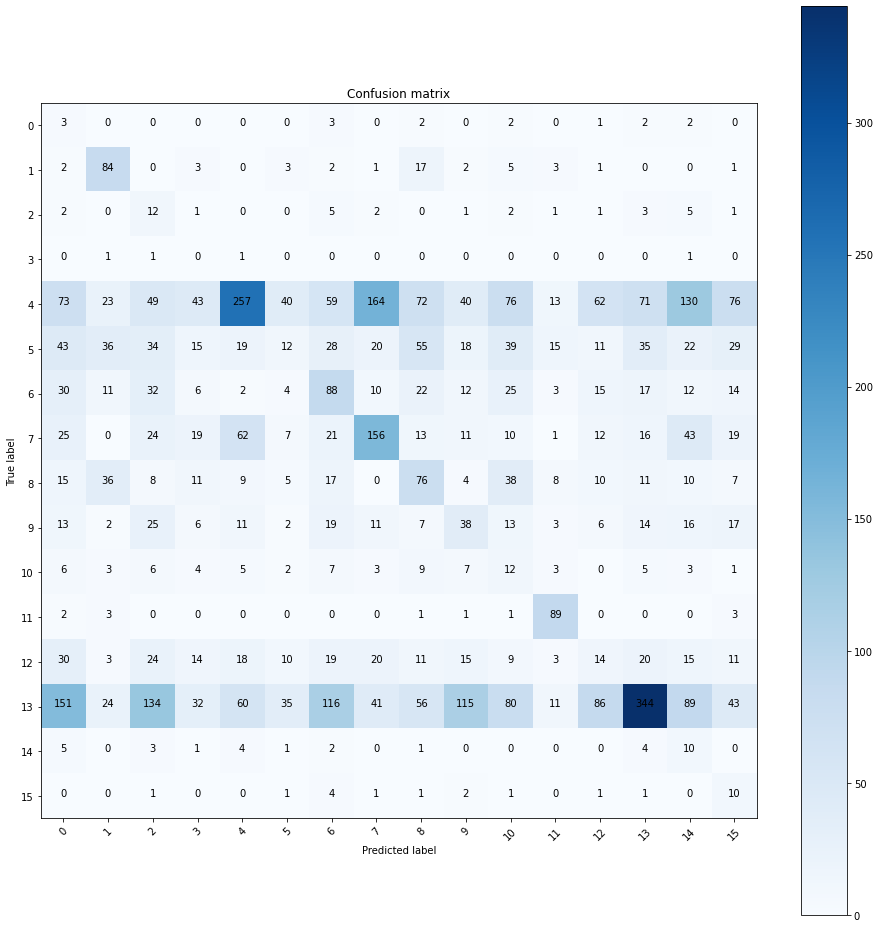

In [85]:
plt.rcParams['figure.figsize'] = (13, 13)

cm1=confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm1, classes=clf1.classes_,
                      title='Confusion matrix')



plt.show()